In [27]:
characters = []
current_character = {}

with open("100personaggi.txt", "r", encoding="utf-8") as file:
    for line in file:
        line = line.strip()

        if line == "-" or line == "":
            if current_character:
                characters.append(current_character)
                current_character = {}
        else:
            key_value = line.split(": ", 1)
            key, value = key_value
            current_character[key.strip()] = value.strip()


# Conto furti per regione
districts_count = {}

for character in characters:
    district = character["Regione"]
    if district not in districts_count: 
        districts_count[district] = 1
    else:
        districts_count[district] += 1

# Convertiamo il dizionario in una lista di tuple (Regione, Numero di furti)
districts_list = [(district, count) for district, count in districts_count.items()]

for i in range(len(districts_list) - 1):
    for j in range(len(districts_list) - i - 1):
        if districts_list[j][1] < districts_list[j + 1][1]:  # Ordine decrescente
            districts_list[j], districts_list[j + 1] = districts_list[j + 1], districts_list[j]

print("Classifica per regione")
for position, (district, total) in enumerate(districts_list, start=1):
    print(f"{position}. {district}: {total}")


#Contiamo per cittadinanza
italian_thieves = 0
foreigner_thieves = 0
for character in characters:
    nationality = character["Cittadinanza"]
    if nationality == "Italiana":
        italian_thieves += 1
    else:
        foreigner_thieves += 1

print("")
print("Distribuzione per cittadinanza:")
print(f"- {italian_thieves} italiani")
print(f"- {foreigner_thieves} non italiani")


#Contiamo per genere M/F
female_count = 0
for character in characters:
    gender = character["Sesso"]
    if gender == "Femmina":
        female_count += 1

male_count = len(characters) - female_count

print("")
print("Distribuzione per sesso:")
print(f"- {male_count} ladri")
print(f"- {female_count} ladre")


#Contiamo per fasce d'età
age_groups = [0] * 8  #creo una lista di 8 spazi vuoti
for character in characters:
    age = int(character["Età"])
    if age <= 13:
        age_groups[0] += 1
    elif age > 13 and age <= 17:
        age_groups[1] +=1
    elif age > 17 and age <= 24:
        age_groups[2] += 1
    elif age > 24 and age <= 34:
        age_groups[3] += 1
    elif age > 34 and age <= 44:
        age_groups[4] += 1
    elif age > 44 and age <= 54:
        age_groups[5] += 1
    elif age > 54 and age <= 64:
        age_groups[6] += 1
    else:
        age_groups[7] += 1

print("")
print("Distribuzione per fasce d'età:")
print(f"- <14: {age_groups[0]}")
print(f"- 14-17: {age_groups[1]}")
print(f"- 18-24: {age_groups[2]}")
print(f"- 25-34: {age_groups[3]}")
print(f"- 35-44: {age_groups[4]}")
print(f"- 45-54: {age_groups[5]}")
print(f"- 55-64: {age_groups[6]}")
print(f"- 65+: {age_groups[7]}")
    

#Contiamo per motivazione
reasons_count = {}
for character in characters:
    reason = character["Motivazione"]
    if reason in reasons_count:
        reasons_count[reason] += 1
    else:
        reasons_count[reason] = 1

print("")
print("Distribuzione per motivazione:")
for reason, count in reasons_count.items():
    print(f"- {reason}: {count}")


#Contiamo quelli con soprannome
count_nicknames = 0

for character in characters:
    name = character["Nome"]
    
    if name.count('"') >= 2:  # Controlla se ci sono almeno due virgolette
        count_nicknames += 1  

print("")
print(f"Autori con soprannomi: {count_nicknames}")
    
#Contiamo i furti speciali
key_words = ["epoca", "lusso", "collezione", "costose", "sportive", "collezionisti", "fascia alta"]
count_special_thefts = 0

for character in characters:
    description = character["Descrizione"].lower()
    for word in key_words:
        if word in description:  
            count_special_thefts += 1  
            break  # Esco dal ciclo per evitare di contare più volte la stessa descrizione

print("")
print(f"Furti di auto non comuni: {count_special_thefts}")



Classifica per regione
1. Lombardia: 11
2. Lazio: 11
3. Emilia-Romagna: 11
4. Campania: 11
5. Veneto: 10
6. Piemonte: 10
7. Toscana: 10
8. Sicilia: 8
9. Puglia: 8
10. Liguria: 7
11. Friuli-Venezia Giulia: 2
12. Marche: 1

Distribuzione per cittadinanza:
- 64 italiani
- 36 non italiani

Distribuzione per sesso:
- 69 ladri
- 31 ladre

Distribuzione per fasce d'età:
- <14: 0
- 14-17: 0
- 18-24: 7
- 25-34: 43
- 35-44: 36
- 45-54: 12
- 55-64: 2
- 65+: 0

Distribuzione per motivazione:
- Business: 64
- Necessità: 17
- Adrenalina: 19

Autori con soprannomi: 51

Furti di auto non comuni: 27


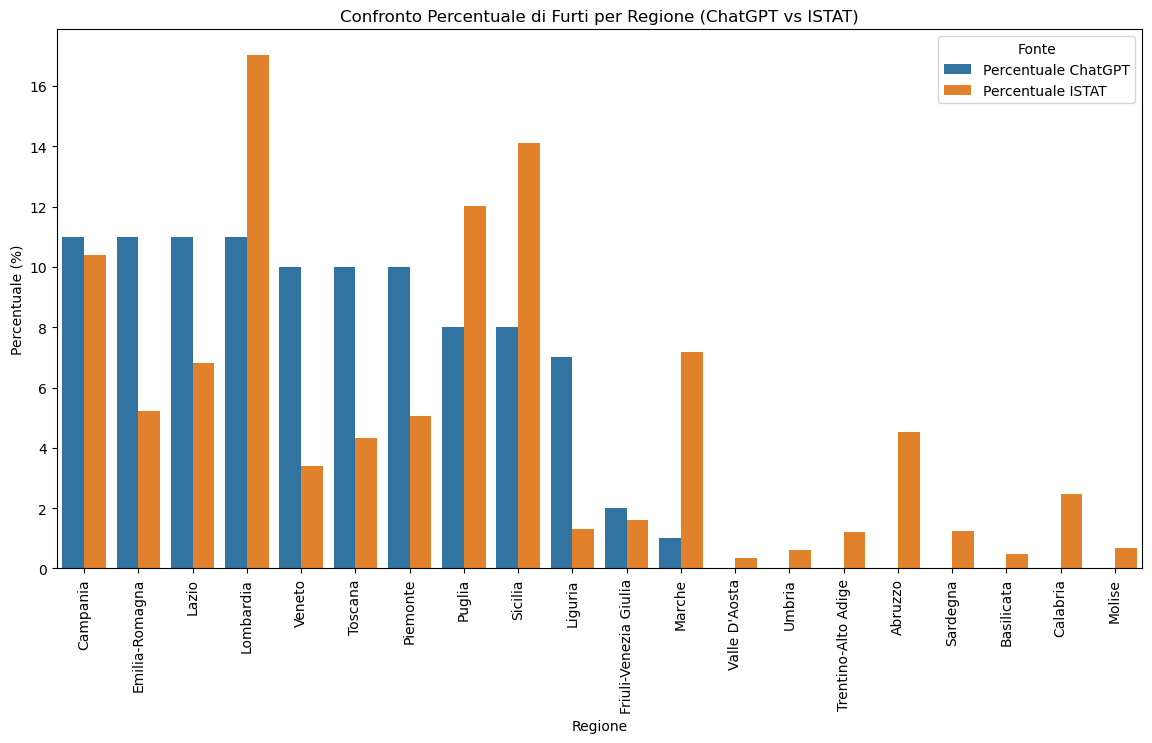

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1. Creazione del DataFrame per i dati di ChatGPT**
df_chatgpt = pd.DataFrame(districts_list, columns=["Regione", "Furti Totali ChatGPT"])

# **Calcoliamo la percentuale dei furti per regione rispetto al totale dei 100 casi generati da ChatGPT**
total_thefts_chatgpt = 100
df_chatgpt["Percentuale ChatGPT"] = (df_chatgpt["Furti Totali ChatGPT"] / total_thefts_chatgpt) * 100


# **2. Caricamento delle percentuali ISTAT dal foglio "districts"**
df_istat = pd.read_excel("istat_furti.xlsx", sheet_name="districts")
df_istat["Percentuale per regione"] *= 100

# Selezioniamo solo le colonne necessarie
df_istat = df_istat[["Regione", "Percentuale per regione"]].rename(columns={"Percentuale per regione": "Percentuale ISTAT"})

# **3. Unione dei due dataset in base alla Regione**
df_confronto = pd.merge(df_istat, df_chatgpt[["Regione", "Percentuale ChatGPT"]],
                        on="Regione", how="outer").fillna(0)

df_confronto = df_confronto.sort_values(by="Percentuale ChatGPT", ascending=False)

# **5. Creazione del grafico con Seaborn**
plt.figure(figsize=(14, 7))

# Converte il DataFrame in formato lungo per Seaborn
df_melted = df_confronto.melt(id_vars="Regione", value_vars=["Percentuale ChatGPT", "Percentuale ISTAT"], 
                              var_name="Fonte", value_name="Percentuale")

# Creazione del grafico con Seaborn
sns.barplot(data=df_melted, x="Regione", y="Percentuale", hue="Fonte")

plt.xticks(rotation=90)
plt.title("Confronto Percentuale di Furti per Regione (ChatGPT vs ISTAT)")
plt.ylabel("Percentuale (%)")
plt.xlabel("Regione")
plt.legend(title="Fonte")
plt.savefig("furti_per_regione.png", dpi=300, bbox_inches="tight")
plt.show()



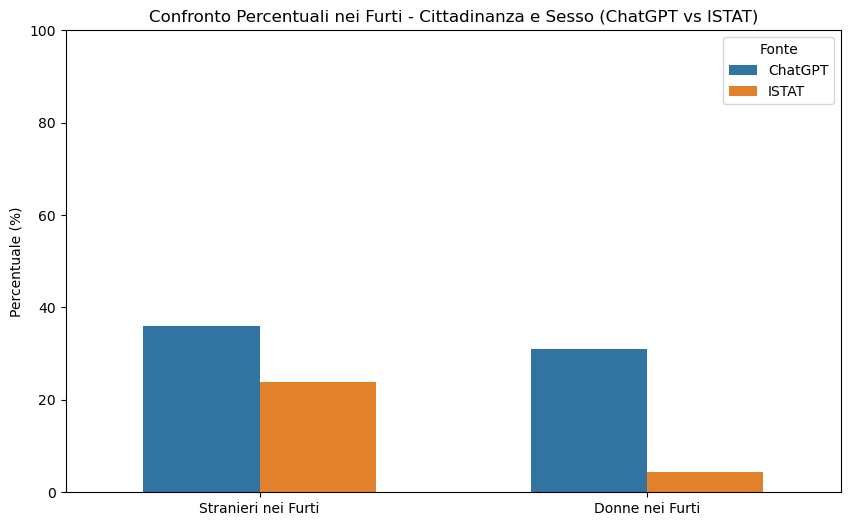

In [33]:
# Calcolo della percentuale di stranieri nei dati di ChatGPT**
total_characters = 100
percentuale_stranieri_chatgpt = (foreigner_thieves / total_characters)*100

# Caricamento della percentuale di stranieri da ISTAT**
df_istat_non_italians = pd.read_excel("istat_furti.xlsx", sheet_name="districts")

# Estrarre la percentuale totale di stranieri**
percentuale_stranieri_istat = float(df_istat_non_italians["Percentuale stranieri"].iloc[0]) * 100

# Calcolo della percentuale di donne nei dati di ChatGPT**
percentuale_donne_chatgpt = (female_count / total_characters)*100

# Caricamento della percentuale di donne da ISTAT**
df_istat_women = pd.read_excel("istat_furti.xlsx", sheet_name="gender")

# Estrarre la percentuale totale di donne**
percentuale_donne_istat = float(df_istat_women["Percentuale donne"].iloc[0]) * 100

# 📌 Creazione del DataFrame combinato
df_confronto = pd.DataFrame({
    "Categoria": ["Stranieri nei Furti", "Stranieri nei Furti", "Donne nei Furti", "Donne nei Furti"],
    "Fonte": ["ChatGPT", "ISTAT", "ChatGPT", "ISTAT"],
    "Percentuale": [percentuale_stranieri_chatgpt, percentuale_stranieri_istat, 
                    percentuale_donne_chatgpt, percentuale_donne_istat]
})

# 📌 Creazione del grafico unificato
plt.figure(figsize=(10, 6))

ax = sns.barplot(data=df_confronto, x="Categoria", y="Percentuale", hue="Fonte", width=0.6)

# 📌 Personalizzazione dell'asse X per separare i gruppi
ax.set_xticks([0, 1])  # 🔹 Due categorie principali
ax.set_xticklabels(["Stranieri nei Furti", "Donne nei Furti"])

# 📌 Titolo e assi
plt.title("Confronto Percentuali nei Furti - Cittadinanza e Sesso (ChatGPT vs ISTAT)")
plt.ylabel("Percentuale (%)")
plt.xlabel("")
plt.ylim(0, 100)  # 🔹 Imposta il massimo al 100%

# 📌 Mostra la legenda
plt.legend(title="Fonte")

# 📌 Mostra il grafico
plt.savefig("furti_per_cittadinanza_e_sesso", dpi=300, bbox_inches="tight")
plt.show()

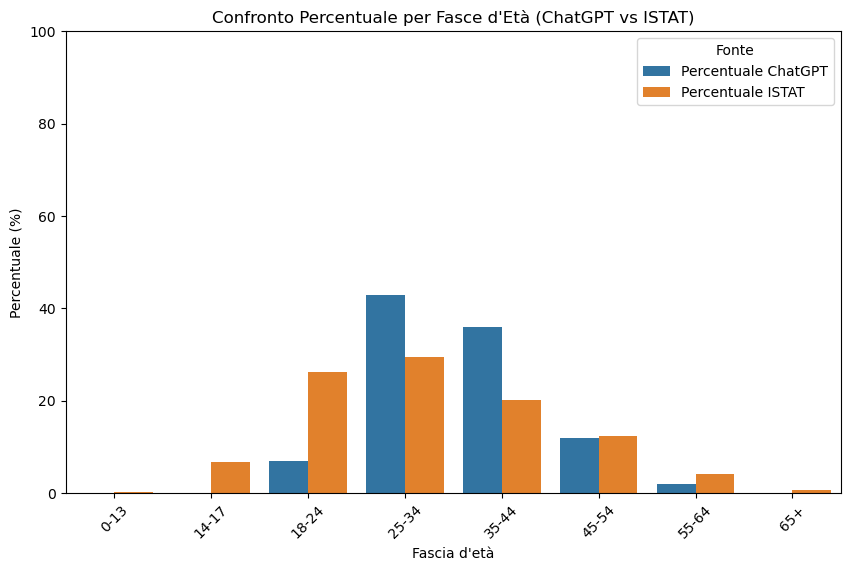

In [35]:
# **1. Definizione delle fasce d'età**
age_labels = [
    "0-13", "14-17", "18-24", "25-34", 
    "35-44", "45-54", "55-64", "65+"
]

# **2. Calcolo della percentuale per ogni fascia d'età nei dati di ChatGPT**
total_characters = 100
percentuali_chatgpt = [(count / total_characters) * 100 for count in age_groups]

# **3. Caricamento delle percentuali ISTAT dal foglio "age"**
df_istat = pd.read_excel("istat_furti.xlsx", sheet_name="age")
df_istat["Percentuale sul totale"] *= 100

# **4. Estrarre la colonna "Percentuale sul totale" da ISTAT**
percentuali_istat = df_istat["Percentuale sul totale"].tolist()  # Convertiamo in lista

# **5. Creazione del DataFrame per il confronto**
df_confronto = pd.DataFrame({
    "Fascia d'età": age_labels,
    "Percentuale ChatGPT": percentuali_chatgpt,
    "Percentuale ISTAT": percentuali_istat
})

# **6. Trasformazione dei dati per il grafico (melt)**
df_melted = df_confronto.melt(id_vars="Fascia d'età", 
                              value_vars=["Percentuale ChatGPT", "Percentuale ISTAT"], 
                              var_name="Fonte", value_name="Percentuale")

# **7. Creazione del grafico con Seaborn**
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Fascia d'età", y="Percentuale", hue="Fonte")

plt.title("Confronto Percentuale per Fasce d'Età (ChatGPT vs ISTAT)")
plt.ylabel("Percentuale (%)")
plt.xlabel("Fascia d'età")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.legend(title="Fonte")
plt.savefig("furti_per_fasce_età", dpi=300, bbox_inches="tight")
plt.show()





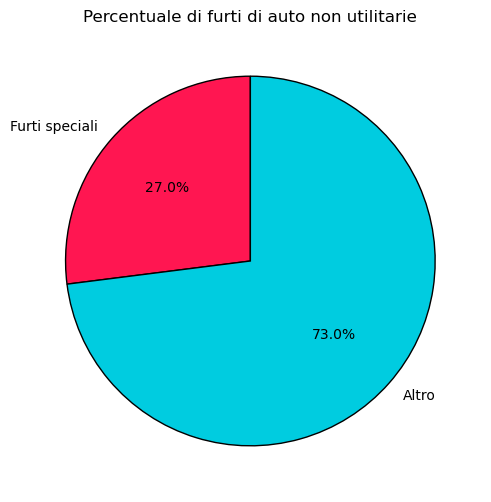

In [11]:
# 📌 Totale personaggi e numero di ladri di auto non utilitarie (sostituisci con i tuoi dati)
total_characters = 100  # Totale personaggi analizzati

# 📌 Calcolo percentuali
percent_special = count_special_thefts
percent_other = 100 - percent_special

# 📌 Creazione del grafico a torta con Matplotlib
plt.figure(figsize=(6, 6))
plt.pie([percent_special, percent_other], 
        labels=["Furti speciali", "Altro"], 
        autopct='%1.1f%%', 
        colors=["#ff1651", "#00cce0"], 
        startangle=90, 
        wedgeprops={'edgecolor': 'black'})

# 📌 Titolo del grafico
plt.title("Percentuale di furti di auto non utilitarie")

# 📌 Mostra il grafico
plt.savefig("furti_speciali", dpi=300, bbox_inches="tight")
plt.show()


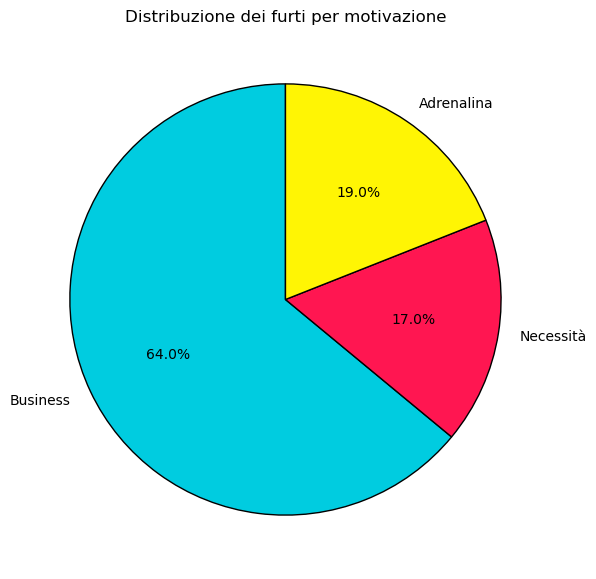

In [39]:
# 📌 Estrazione delle etichette (motivazioni) e dei valori (conteggi)
labels = list(reasons_count.keys())   # estrae le motivazioni (chiavi del dizionario) e le converte in lista
sizes = list(reasons_count.values())  # estrae il numero (valori del dizionario) e converte in lista

# 📌 Creazione del grafico a torta
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=["#00cce0", "#ff1651", "#fff504"], wedgeprops={'edgecolor': 'black'})

# 📌 Titolo del grafico
plt.title("Distribuzione dei furti per motivazione")

# 📌 Mostra il grafico
plt.savefig("furti_per_motivazione", dpi=300, bbox_inches="tight")
plt.show()
